In [1]:
import sqlite3 as LDBI
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
db1 = LDBI.connect('Map.db')

Roads = pd.read_sql_query("SELECT * from Roads", db1)
Features = pd.read_sql_query("SELECT * from Features", db1)
InstalledFeatures = pd.read_sql_query("SELECT * from InstalledFeatures", db1)
Intersections = pd.read_sql_query("SELECT * from Intersections", db1)
sqlite_sequence = pd.read_sql_query("SELECT * from sqlite_sequence", db1)

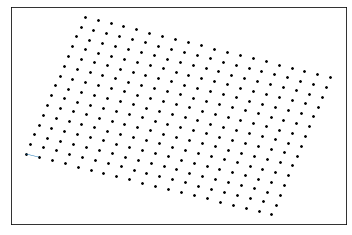

In [3]:
# basic plot of intersections only

x = Intersections.X.tolist()
y = Intersections.Y.tolist()

plt.xticks([])
plt.yticks([])

plt.scatter(x, y, color='black', s=1.5)
plt.plot(x, y, 'o', color='black', markersize=1.5)

point1 = [Intersections.X.tolist()[0], Intersections.Y.tolist()[0]]
point2 = [Intersections.X.tolist()[1], Intersections.Y.tolist()[1]]

x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]

plt.plot(x_values, y_values, linewidth=.5)
# plt.savefig('image.png', dpi=500)

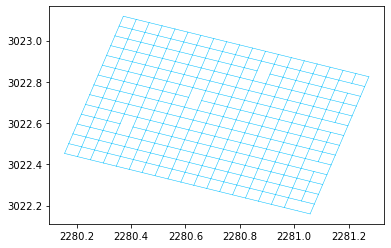

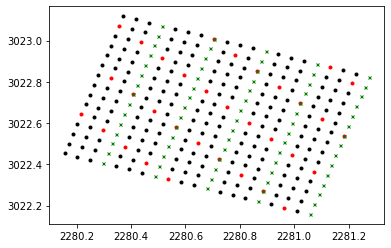

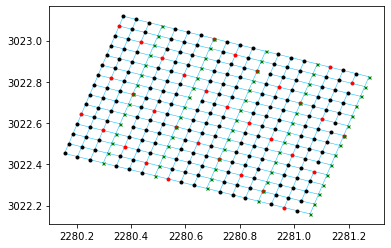

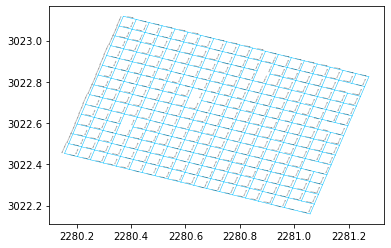

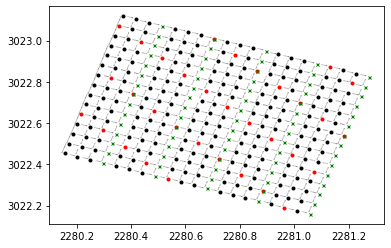

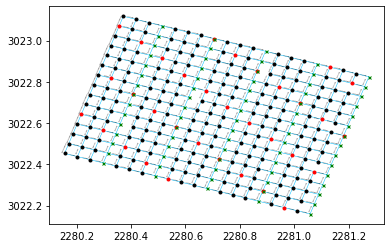

In [4]:
figures = ['fig_s', 'fig_i', 'fig_n', 'fig_si', 'fig_sn', 'fig_in', 'fig_sin']
axes = ['ax_s', 'ax_i', 'ax_n', 'ax_si', 'ax_sn', 'ax_in', 'ax_sin']

for fig, ax in zip(figures,axes):
    vars()[fig], vars()[ax] = plt.subplots()
#     vars()[ax].set_xticks([])
#     vars()[ax].set_yticks([])

sd = 3  # size of the dots
sx = 3 # size of the crosses
f = 1.5 # fontsize

x = Intersections.X.tolist()
y = Intersections.Y.tolist()

# create a new slope function:  
def slope(x1, y1, x2, y2):
    m = (y2-y1)/(x2-x1)
    return abs(m)

# plot the roads
for i in range(len(Roads)):
    index_0 = Roads.iloc[i].startNodeID
    index_1 = Roads.iloc[i].endNodeID

    x_values = [Intersections.iloc[index_0-1].X, Intersections.iloc[index_1-1].X]
    y_values = [Intersections.iloc[index_0-1].Y, Intersections.iloc[index_1-1].Y]
    ax_s.plot(x_values, y_values, linewidth=.5, color = 'deepskyblue')
    ax_si.plot(x_values, y_values, linewidth=.5, color = 'deepskyblue')
    ax_sn.plot(x_values, y_values, linewidth=.5, color = 'deepskyblue')
    ax_sin.plot(x_values, y_values, linewidth=.5, color = 'deepskyblue')
    
# plot the labels
for i in range(len(Roads)):
    index_0 = Roads.iloc[i].startNodeID
    index_1 = Roads.iloc[i].endNodeID
    x_value = (Intersections.iloc[index_0-1].X + Intersections.iloc[index_1-1].X)/2
    y_value = (Intersections.iloc[index_0-1].Y + Intersections.iloc[index_1-1].Y)/2

    m = slope(Intersections.iloc[index_0-1].X, Intersections.iloc[index_0-1].Y, 
                Intersections.iloc[index_1-1].X, Intersections.iloc[index_1-1].Y)

    if np.isclose(m, 0.3249197):
        rot = -13
        x_div = 8
        y_div = 1.5
    elif np.isclose(m, 3.0776835):
        rot = 66
        x_div = -4
        y_div = 1.5
    
    ax_n.plot(x_values, y_values, linewidth=1, color = 'deepskyblue')
    ax_n.text(x_value + 0.024/x_div, y_value + 0.008/y_div, Roads.iloc[i]['name'], fontsize=f, rotation=rot, 
             rotation_mode='anchor', ha = 'center', va = 'center')
    ax_in.text(x_value + 0.024/x_div, y_value + 0.008/y_div, Roads.iloc[i]['name'], fontsize=f, rotation=rot, 
             rotation_mode='anchor', ha = 'center', va = 'center')
    ax_sn.text(x_value + 0.024/x_div, y_value + 0.008/y_div, Roads.iloc[i]['name'], fontsize=f, rotation=rot, 
             rotation_mode='anchor', ha = 'center', va = 'center')
    ax_sin.text(x_value + 0.024/x_div, y_value + 0.008/y_div, Roads.iloc[i]['name'], fontsize=f, rotation=rot, 
             rotation_mode='anchor', ha = 'center', va = 'center')
    

# plot red and green intersections
l = []
for index, row in InstalledFeatures.iterrows():
    if row.FeatureID == 1:
        marker = 'o'
        clr = 'red'
        msize=sd
    elif row.FeatureID == 2:
        marker = 'x'
        clr = 'green'
        msize=sx
    ax_i.plot(x[row.intersectionID-1], y[row.intersectionID-1], marker, color=clr, markersize=msize)
    l.append(row.intersectionID)
    ax_in.plot(x[row.intersectionID-1], y[row.intersectionID-1], marker, color=clr, markersize=msize)
    l.append(row.intersectionID)
    ax_si.plot(x[row.intersectionID-1], y[row.intersectionID-1], marker, color=clr, markersize=msize)
    l.append(row.intersectionID)
    ax_sin.plot(x[row.intersectionID-1], y[row.intersectionID-1], marker, color=clr, markersize=msize)
    l.append(row.intersectionID)
    
# plot all other intersections
not_ints = list(set(l))
all_ints = Intersections.ID.tolist()
ints = [x for x in all_ints if x not in not_ints]   # select the intersections thathave not been plotted yet
for i in ints:
    ax_i.plot(x[i-1], y[i-1], 'o', color='black', markersize=sd)
    ax_in.plot(x[i-1], y[i-1], 'o', color='black', markersize=sd)
    ax_si.plot(x[i-1], y[i-1], 'o', color='black', markersize=sd)
    ax_sin.plot(x[i-1], y[i-1], 'o', color='black', markersize=sd)

In [5]:
fig_s.savefig('./Figs/fig_s.png', dpi=500)
fig_i.savefig('./Figs/fig_i.png', dpi=500)
fig_si.savefig('./Figs/fig_si.png', dpi=500)
fig_sn.savefig('./Figs/fig_sn.png', dpi=500)
fig_in.savefig('./Figs/fig_in.png', dpi=500)
fig_sin.savefig('./Figs/fig_sin.png', dpi=500)

In [6]:
# some commands I used for testing

# plt = 'self.fig_s'
# filename = 'fig_s' + '.png'
# string = f"{plt}.savefig('{filename}', dpi=500')"
# print(string)
# exec(plt+'.savefig('+filename+', dpi=500')

# x = "borna/dfjdsklf/sdfdsf/fdt/ea/map.db"
# x.split("/")[-1]

# ax_i.bbox.get_points()
# ax_s.get_tightbbox(fig_s.canvas.get_renderer()).get_points()
# ax_n.get_tightbbox(fig_n.canvas.get_renderer()).get_points()

# del fig_s, fig_i

In [7]:
# demo for using plt.subplots()

# import numpy as np
# import matplotlib.pyplot as plt

# x = np.arange(0,10,0.1)
# y1 = x
# y2 = np.sin(x)

# plt.xticks([])
# plt.yticks([])

# fig1, ax1 = plt.subplots()
# fig2, ax2 = plt.subplots()
# fig3, ax3 = plt.subplots()

# ax1.plot(x, y1, linewidth=1, color = 'deepskyblue')
# ax2.plot(x, y2, linewidth=1, color = 'red')

# ax3.plot(x, y1, linewidth=1, color = 'deepskyblue')
# ax3.plot(x, y2, linewidth=1, color = 'red')